<a href="https://colab.research.google.com/github/egafdharmawan/Customer-Retention/blob/main/Composite_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 . Import Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [ ]:
data = 'https://raw.githubusercontent.com/egafdharmawan/Customer-Retention/main/data.csv'
data = pd.read_csv(data)
data.head()

,TransactionId,UserId,City,Country,Age,DOB,Product,Sales,Transaction Date,Income,Has Children,Marital Status,College Degree,Home Owner
0,71568,913,personperson,UK,51,2006,Blender,116.490,2023-01-31,62450.71,1,Single,No,Yes
1,97957,11,person person,US,50,2006,Coffee Maker,151.785,2023-01-31,52926.04,0,Married,No,Yes
2,79116,1239,personperson,US,31,2006,Blender,216.135,2023-01-31,64715.33,0,Single,No,No
3,66490,1149,person personperson,UK,46,2006,Blender,56.085,2023-01-31,77845.45,4,Single,No,Yes
4,93926,1025,person person,UK,56,2006,Coffee Maker,163.725,2023-01-31,51487.70,0,Married,No,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TransactionId     100000 non-null  int64  
 1   UserId            100000 non-null  int64  
 2   City              100000 non-null  object 
 3   Country           100000 non-null  object 
 4   Age               100000 non-null  int64  
 5   DOB               100000 non-null  int64  
 6   Product           100000 non-null  object 
 7   Sales             100000 non-null  float64
 8   Transaction Date  100000 non-null  object 
 9   Income            100000 non-null  float64
 10  Has Children      100000 non-null  int64  
 11  Marital Status    100000 non-null  object 
 12  College Degree    100000 non-null  object 
 13  Home Owner        100000 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 10.7+ MB


## A. Preprocessing

In [ ]:
# Preprocessing
data['Date'] = data['Transaction Date'].astype(str).str[:10]
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Revenue'] = data['Sales']
data.drop(['DOB','City','Sales','Transaction Date'], axis=1, inplace=True)
data.head()

,TransactionId,UserId,Country,Age,Product,Income,Has Children,Marital Status,College Degree,Home Owner,Date,Month,Revenue
0,71568,913,UK,51,Blender,62450.71,1,Single,No,Yes,2023-01-31,1,116.490
1,97957,11,US,50,Coffee Maker,52926.04,0,Married,No,Yes,2023-01-31,1,151.785
2,79116,1239,US,31,Blender,64715.33,0,Single,No,No,2023-01-31,1,216.135
3,66490,1149,UK,46,Blender,77845.45,4,Single,No,Yes,2023-01-31,1,56.085
4,93926,1025,UK,56,Coffee Maker,51487.70,0,Married,No,Yes,2023-01-31,1,163.725


# 2 . Analyse

## A. Cohort Analysis

In [ ]:
def MonthlyCohortAnalysis(data):
  bait = pd.DataFrame(data.groupby(['UserId'])['Month'].min()).reset_index()
  bait.columns = ['UserId','Cohort']
  all = data.merge(bait, how='left', on='UserId')
  all['Diff'] = all['Month'] - all['Cohort']

  cohort_counts_unique = all.pivot_table(
      index='Cohort',
      columns='Diff',
      values='UserId',
      aggfunc='nunique'
  )

  cohort_counts_unique.fillna(0, inplace=True)
  cohorts = cohort_counts_unique.divide(cohort_counts_unique.iloc[:,0],axis=0)
  return cohorts

In [ ]:
cohorts = MonthlyCohortAnalysis(data)
cohorts

Diff,0,1,2,3,4,5,6,7,8,9,10
Cohort,,,,,,,,,,,
1,1.0,0.864078,0.941748,0.951456,0.912621,0.951456,0.941748,0.932039,0.135922,0.000000,0.000000
2,1.0,0.847445,0.891971,0.884672,0.867153,0.889051,0.897080,0.134307,0.065693,0.070803,0.067153
3,1.0,0.830849,0.856185,0.867362,0.878539,0.874814,0.759314,0.765276,0.752608,0.764531,0.000000
4,1.0,0.830626,0.819026,0.865429,0.863882,0.139985,0.105182,0.105182,0.107502,0.000000,0.000000
5,1.0,0.808564,0.857263,0.855584,0.804366,0.806045,0.794291,0.816961,0.000000,0.000000,0.000000
6,1.0,0.811060,0.870968,0.795392,0.793548,0.792627,0.803687,0.000000,0.000000,0.000000,0.000000
7,1.0,0.828240,0.087460,0.060063,0.056902,0.063224,0.000000,0.000000,0.000000,0.000000,0.000000
8,1.0,0.087719,0.073684,0.069006,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1.0,0.849478,0.859911,0.900149,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Axes: xlabel='Diff', ylabel='Cohort'>

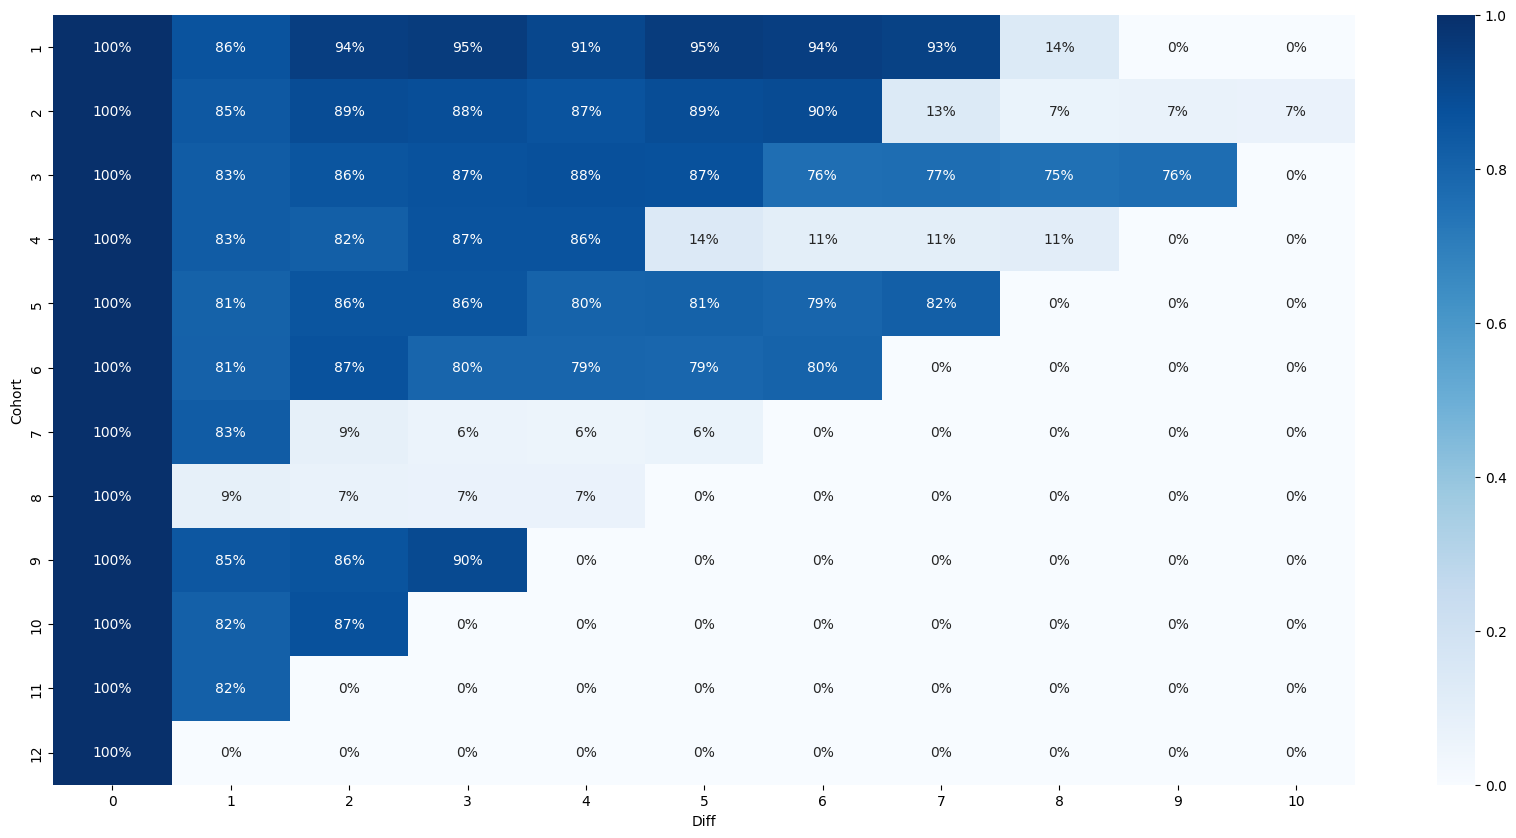

In [ ]:
# plot
plt.figure(figsize=(21,10))
sns.heatmap(cohorts, annot=True, cmap='Blues', fmt='.0%')

## B. RFM Segmentation

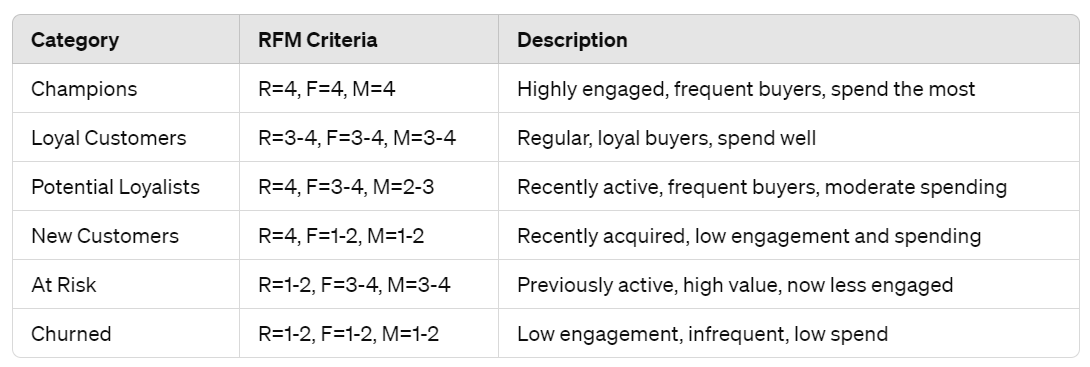

In [ ]:
def RFMSegmentation(data):
  # Frequency
  freq = pd.DataFrame(data.groupby(['UserId'])['TransactionId'].count().reset_index())
  freq.columns = ['UserId','Frequency']
  freq['F'] = pd.qcut(freq['Frequency'], 4, labels=[1,2,3,4])

  # Recency
  maxDate = data['Date'].max()
  rec = pd.DataFrame(data.groupby(['UserId'])['Date'].max().reset_index())
  rec['Diff'] = maxDate - rec['Date']
  rec['Diff'] = rec['Diff'].astype(str).str.replace('0:00:00', '0 days')
  rec['Diff'] = rec['Diff'].astype(str).str.split(' ').str[0].astype(int)
  rec.columns = ['UserId','LatestDate', 'Recency']
  rec['R'] = pd.qcut(rec['Recency'].rank(method='first'), 4, labels=[4,3,2,1])

  # Monetary
  mon = pd.DataFrame(data.groupby(['UserId'])['Revenue'].sum().reset_index())
  mon.columns = ['UserId','Monetary']
  mon['M'] = pd.qcut(mon['Monetary'], 4, labels=[1,2,3,4])

  # RFM
  RFM = rec.merge(freq, on='UserId')
  RFM = RFM.merge(mon, on='UserId')
  RFM['RFM'] = RFM['R'].astype(str) + '' + RFM['F'].astype(str) + '' + RFM['M'].astype(str)

  return RFM

In [ ]:
def RFMSegmentationCategory(data):
  # Frequency
  freq = pd.DataFrame(data.groupby(['UserId'])['TransactionId'].count().reset_index())
  freq.columns = ['UserId','Frequency']
  freq['F'] = pd.qcut(freq['Frequency'], 4, labels=[1,2,3,4])

  # Recency
  maxDate = data['Date'].max()
  rec = pd.DataFrame(data.groupby(['UserId'])['Date'].max().reset_index())
  rec['Diff'] = maxDate - rec['Date']
  rec['Diff'] = rec['Diff'].astype(str).str.replace('0:00:00', '0 days')
  rec['Diff'] = rec['Diff'].astype(str).str.split(' ').str[0].astype(int)
  rec.columns = ['UserId','LatestDate', 'Recency']
  rec['R'] = pd.qcut(rec['Recency'].rank(method='first'), 4, labels=[4,3,2,1])

  # Monetary
  mon = pd.DataFrame(data.groupby(['UserId'])['Revenue'].sum().reset_index())
  mon.columns = ['UserId','Monetary']
  mon['M'] = pd.qcut(mon['Monetary'], 4, labels=[1,2,3,4])

  # RFM
  RFM = rec.merge(freq, on='UserId')
  RFM = RFM.merge(mon, on='UserId')
  RFM['RFM'] = RFM['R'].astype(str) + '' + RFM['F'].astype(str) + '' + RFM['M'].astype(str)

  def categorize_customer(row):
    if row['R'] == 4 and row['F'] == 4 and row['M'] == 4:
        return 'Champions'
    elif row['R'] >= 3 and row['F'] >= 3 and row['M'] >= 3:
        return 'Loyal Customers'
    elif row['R'] == 4 and row['F'] >= 3 and row['M'] >= 2:
        return 'Potential Loyalists'
    elif row['R'] >= 3 and row['F'] >= 2 and row['M'] >= 2:
        return 'New Customers'
    elif row['R'] <= 2 and row['F'] >= 2 or row['M'] >= 2:
        return 'At Risk'
    elif row['R'] == 1 or row['F'] == 1 or row['M'] == 1:
        return 'Churned'
    else:
        return 'Other'

  # Apply the categorization
  RFM['Category'] = RFM.apply(categorize_customer, axis=1)
  RFM = RFM[['UserId','Category']]

  return RFM

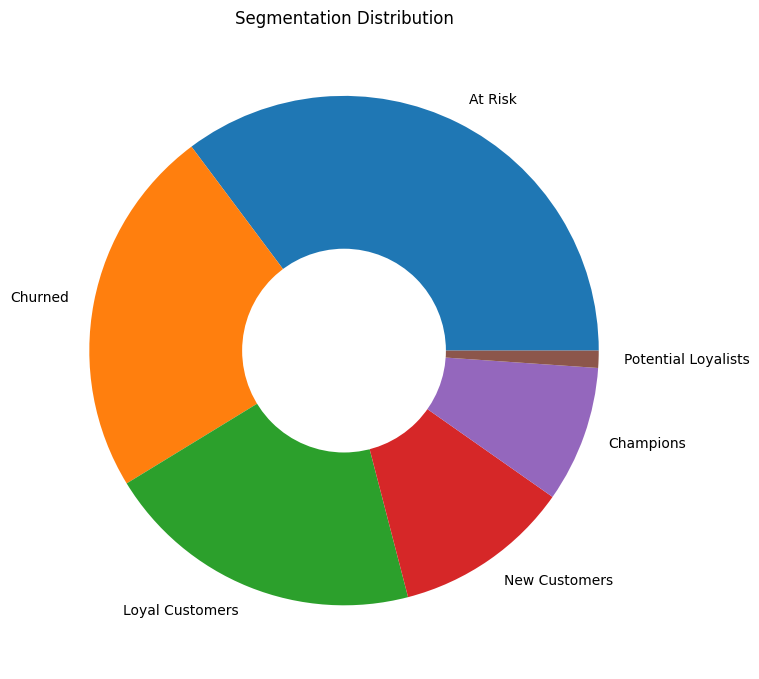

In [ ]:
rfm = RFMSegmentationCategory(data)

# Visual Distribution
plt.pie(rfm['Category'].value_counts(),
        labels=rfm['Category'].value_counts().index.tolist())
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Segmentation Distribution')
plt.show()

In [ ]:
## Calculate Repeat Purchase Rate
# Get Data
rpr = data.copy()
rpr = rpr[['TransactionId','UserId']]
rfm = RFMSegmentationCategory(data)
rpr = rpr.merge(rfm, on='UserId', how='left')

# Calculate Repeat Purchase Rate
rpr_base = rpr.groupby(['Category','UserId'])['TransactionId'].size().reset_index()
rpr_base.columns = ['Category', 'UserId', 'Total Transaction']
rpr_total = rpr.groupby(['Category'])['UserId'].size().reset_index()
rpr_total.columns = ['Category', 'Total User']
rpr_repeat = rpr_base[rpr_base['Total Transaction'] > 1]
rpr_repeat = rpr_repeat.groupby(['Category'])['UserId'].size().reset_index()
rpr_repeat.columns = ['Category', 'Repeat User']
rpr = rpr_base.merge(rpr_total, how='left', on='Category')
rpr = rpr.merge(rpr_repeat, how='left', on='Category')
rpr['Repeat Purchase Rate'] = round((rpr['Repeat User'] / rpr['Total User']) * 100, 2)
rpr = rpr[['Category','Repeat Purchase Rate']]
rpr = pd.DataFrame(rpr.groupby(['Category'])['Repeat Purchase Rate'].mean().reset_index())
rpr

,Category,Repeat Purchase Rate
0,At Risk,10.06
1,Champions,4.39
2,Churned,30.76
3,Loyal Customers,6.78
4,New Customers,14.39
5,Potential Loyalists,9.89


## C. Distribution of Segment in Cohort

In [ ]:
cohort = pd.DataFrame(data.groupby(['UserId'])['Month'].min()).reset_index()
cohort.columns = ['UserId','Cohort']
cohort = data.merge(cohort, how='left', on='UserId')
cohort = cohort[['UserId','Cohort']]
cohort = cohort[cohort['Cohort'].isin([5,9,10])]
cohort = cohort.merge(rfm, how='left', on='UserId')
cohort.groupby(['Cohort','Category'])['UserId'].count()

Cohort  Category           
5       At Risk                 823
        Champions              5132
        Churned                 286
        Loyal Customers        8643
        New Customers           910
        Potential Loyalists     261
9       At Risk                 216
        Champions               229
        Churned                 483
        Loyal Customers        1977
        New Customers          1798
        Potential Loyalists     333
10      At Risk                 236
        Champions                15
        Churned                 807
        Loyal Customers         558
        New Customers          1553
        Potential Loyalists     144
Name: UserId, dtype: int64

## D. Customer Lifetime Value

In [ ]:
# Calculate CLV Score
## AVG Purchase * Purchase Freq * Cus Lifespab
clv = data.copy()
clv = clv[['TransactionId','UserId','Month','Revenue']]

# AVG purchase
avg = pd.DataFrame(clv.groupby(['UserId'])['Revenue'].mean().reset_index())
avg.columns = ['UserId','AVG Purchase']

# purhcase Freq
freq = pd.DataFrame(clv.groupby(['UserId'])['TransactionId'].count().reset_index())
freq.columns = ['UserId','Qty Purchase']

# lifespan
ls_max = pd.DataFrame(clv.groupby(['UserId'])['Month'].max().reset_index())
ls_max.columns = ['UserId','Max Month']
ls_min = pd.DataFrame(clv.groupby(['UserId'])['Month'].min().reset_index())
ls_min.columns = ['UserId','Min Month']
ls = ls_max.merge(ls_min, how='left', on='UserId')
ls['Lifespan'] = ls['Max Month'] - ls['Min Month'] + 1

# Merge
clv = clv.merge(avg, how='left')
clv = clv.merge(freq, how='left')
clv = clv.merge(ls, how='left')
clv['CLV'] = clv['AVG Purchase'] * clv['Qty Purchase'] * clv['Lifespan']

# Normalize
min_val = clv['CLV'].min()
max_val = clv['CLV'].max()
normalized_column = 1 + (clv['CLV'] - min_val) * (3 / (max_val - min_val))

# Update the DataFrame with the normalized values
clv['CLV Score'] = round(normalized_column, 2)
clv = clv[['UserId','CLV Score']]
clv.drop_duplicates(inplace=True)
clv

,UserId,CLV Score
0,913,1.15
1,11,1.17
2,1239,1.34
3,1149,1.53
4,1025,1.27
...,...,...
99931,10690,1.00
99959,10675,1.00
99964,10741,1.00
99968,10649,1.00


In [ ]:
merge = rfm.merge(clv, how='left', on='UserId')
merge = pd.DataFrame(merge.groupby(['Category'])['CLV Score'].mean().reset_index())
merge

,Category,CLV Score
0,At Risk,1.137014
1,Champions,1.481753
2,Churned,1.011982
3,Loyal Customers,1.273806
4,New Customers,1.081379
5,Potential Loyalists,1.086055


## E. Calculate Weighted Score

In [ ]:
ret = pd.DataFrame(data.groupby(['UserId'])['Month'].min()).reset_index()
ret.columns = ['UserId','Cohort']
ret = data.merge(ret, how='left', on='UserId')
ret = ret[['UserId','Cohort']]
ret.drop_duplicates(inplace=True)
ret

,UserId,Cohort
0,913,1
1,11,1
2,1239,1
3,1149,1
4,1025,1
...,...,...
99931,10690,12
99959,10675,12
99964,10741,12
99968,10649,12


In [ ]:
# Calculate Cohort Score
cohort_score = cohorts.reset_index()
row_col_pairs = [(1,10), (2,9), (3, 8), (4, 7), (5, 6), (6, 5),
                 (7, 4), (8, 3), (9, 2), (10, 1)]
sets = []
values = []
for row, col in row_col_pairs:
    sets.append(col)
    values.append(cohort_score.loc[row, col])

sample = {'Cohort': sets, 'Retention': values}
cohort_score = pd.DataFrame(sample)
cohort_score['Cohort Month'] = 12 - cohort_score['Cohort']
cohort_score = cohort_score[['Cohort Month','Retention']]

# Perform Min-Max normalization
min_val = cohort_score['Retention'].min()
max_val = cohort_score['Retention'].max()
normalized_column = 1 + (cohort_score['Retention'] - min_val) * (3 / (max_val - min_val))

# Update the DataFrame with the normalized values
cohort_score['Cohort Score'] = round(normalized_column, 2)
cohort_score = cohort_score[['Cohort Month','Cohort Score']]
cohort_score

,Cohort Month,Cohort Score
0,2,1.01
1,3,3.51
2,4,1.16
3,5,3.70
4,6,3.65
5,7,1.00
6,8,1.01
7,9,4.00
8,10,3.90
9,11,3.70


In [ ]:
# Calculate RFM
RFMs = RFMSegmentation(data)
RFMs = RFMs[['UserId','R','F','M']]
RFMs

,UserId,R,F,M
0,1,1,3,3
1,2,1,4,3
2,3,2,4,4
3,4,1,3,2
4,5,1,3,3
...,...,...,...,...
10017,10747,4,1,1
10018,10760,4,1,1
10019,10767,4,1,1
10020,10785,4,1,1


In [ ]:
# Calculate Composite Score
ret = ret.merge(cohort_score, how='left', left_on='Cohort', right_on='Cohort Month')
ret = ret.merge(clv, on='UserId', how='left')
ret = ret.merge(RFMs, on='UserId', how='left')

Cohort_Weight = 0.1
CLV_Weight = 0.3
R_Weight = 0.2
F_Weight = 0.2
M_Weight = 0.2

ret.dropna(inplace=True)
ret['Composite Score'] = ((ret['Cohort Score'] * Cohort_Weight) +
                          (ret['CLV Score'].astype(float) * CLV_Weight) +
                          (ret['R'].astype(int) * R_Weight) +
                          (ret['F'].astype(int) * F_Weight) +
                          (ret['M'].astype(int) * M_Weight))

ret = ret[['UserId','Composite Score']]
ret

,UserId,Composite Score
103,1085,1.855
104,49,1.625
105,495,1.846
106,1166,1.849
107,907,2.488
...,...,...
9960,9929,1.670
9961,9845,1.670
9962,9939,1.670
9963,9823,1.673


In [ ]:
# Combine with data
anls = data.copy()
anls = anls.merge(ret, on='UserId', how='left')
anls

,TransactionId,UserId,Country,Age,Product,Income,Has Children,Marital Status,College Degree,Home Owner,Date,Month,Revenue,Composite Score
0,71568,913,UK,51,Blender,62450.71,1,Single,No,Yes,2023-01-31,1,116.490,NaN
1,97957,11,US,50,Coffee Maker,52926.04,0,Married,No,Yes,2023-01-31,1,151.785,NaN
2,79116,1239,US,31,Blender,64715.33,0,Single,No,No,2023-01-31,1,216.135,NaN
3,66490,1149,UK,46,Blender,77845.45,4,Single,No,Yes,2023-01-31,1,56.085,NaN
4,93926,1025,UK,56,Coffee Maker,51487.70,0,Married,No,Yes,2023-01-31,1,163.725,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12583,2654,UK,52,Coffee Maker,51621.63,1,Married,No,No,2023-12-31,12,67.080,3.156
99996,42044,9644,Germany,63,Blender,46453.34,2,Married,Yes,Yes,2023-12-31,12,133.780,NaN
99997,7371,1738,UK,42,Blender,61137.78,2,Single,No,No,2023-12-31,12,76.590,2.078
99998,7319,1729,UK,59,Coffee Maker,51833.62,0,Divorced,No,Yes,2023-12-31,12,137.220,2.738


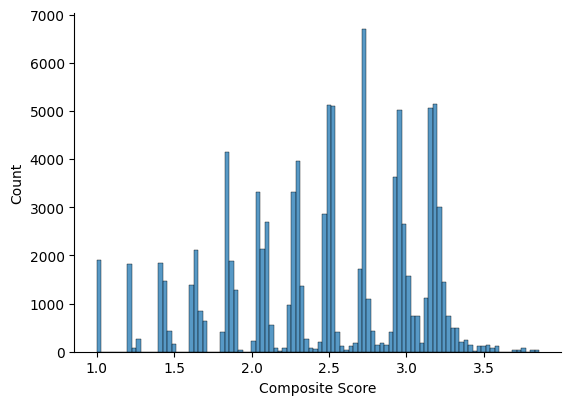

In [ ]:
# Check Distribution of composite score, get findings
g = sns.displot(anls['Composite Score'], bins=100)
g.fig.set_figwidth(6)
g.fig.set_figheight(4)

## F. EDA

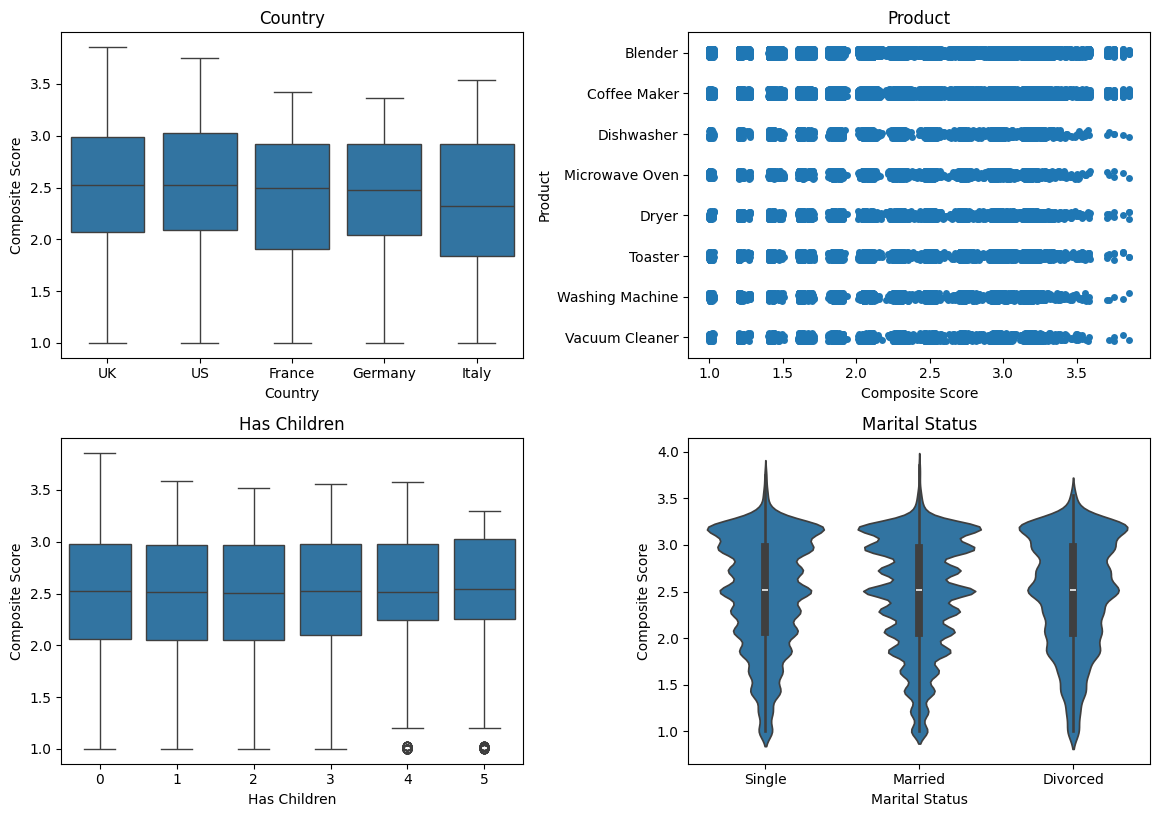

In [ ]:
fig, axs = plt.subplots(2, 2)

# Country
sns.boxplot(data=anls, x="Country", y="Composite Score",ax=axs[0, 0])
axs[0, 0].set_title('Country')

# Product
sns.stripplot(data=anls, x="Composite Score", y="Product",ax=axs[0, 1])
axs[0, 1].set_title('Product')

# Has Children
sns.boxplot(data=anls, x="Has Children", y="Composite Score", ax=axs[1, 0])
axs[1, 0].set_title('Has Children')

# Marital Status
sns.violinplot(data=anls, x="Marital Status", y="Composite Score", ax=axs[1, 1])
axs[1, 1].set_title('Marital Status')

plt.tight_layout()
plt.show()

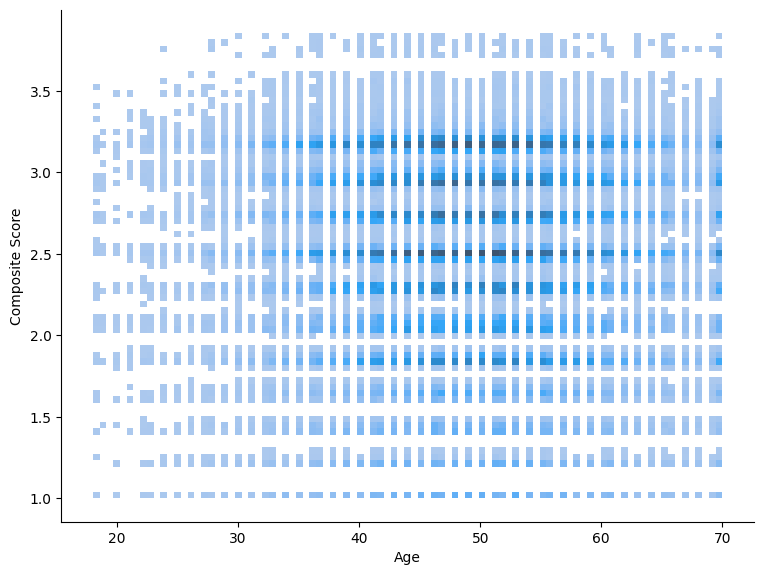

In [ ]:
# Age
g = sns.displot(data=anls, x="Age", y="Composite Score")
g.fig.set_figwidth(8.27)
g.fig.set_figheight(6)

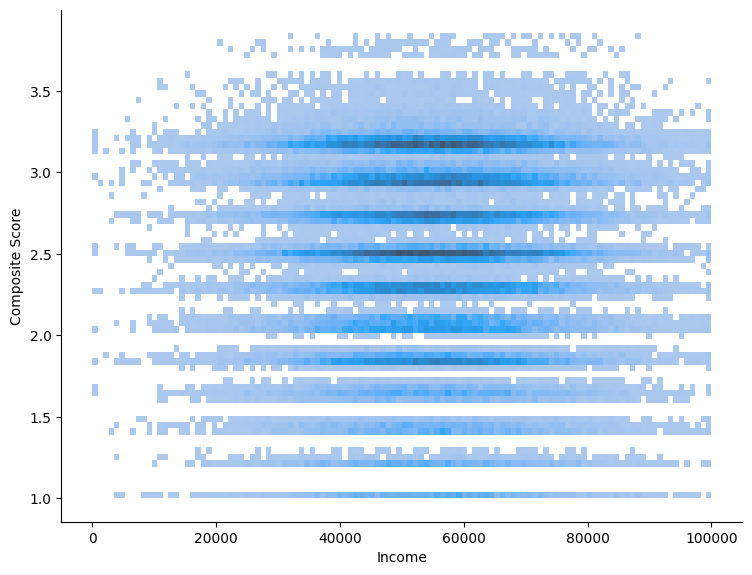

In [ ]:
# Income
g = sns.displot(data=anls, x="Income", y="Composite Score")
g.fig.set_figwidth(8.27)
g.fig.set_figheight(6)

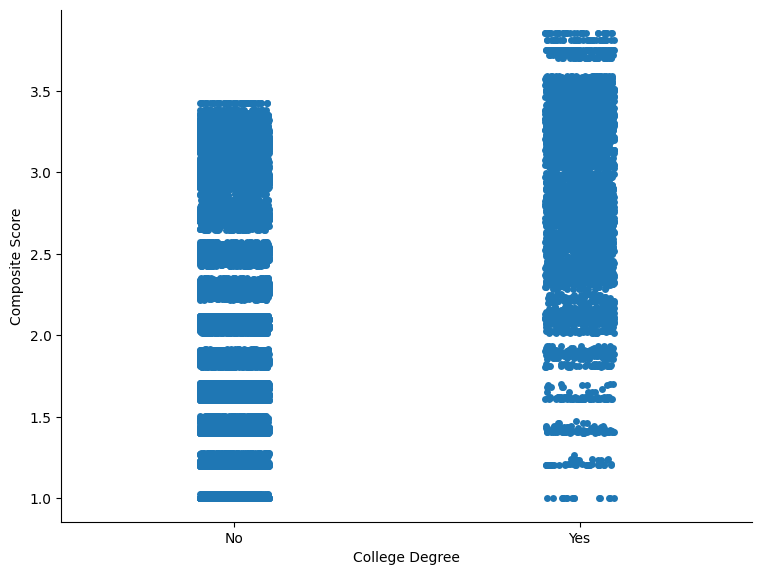

In [ ]:
# College Degree
g = sns.catplot(data=anls, x="College Degree", y="Composite Score")
g.fig.set_figwidth(8.27)
g.fig.set_figheight(6)

<Axes: xlabel='Home Owner', ylabel='Composite Score'>

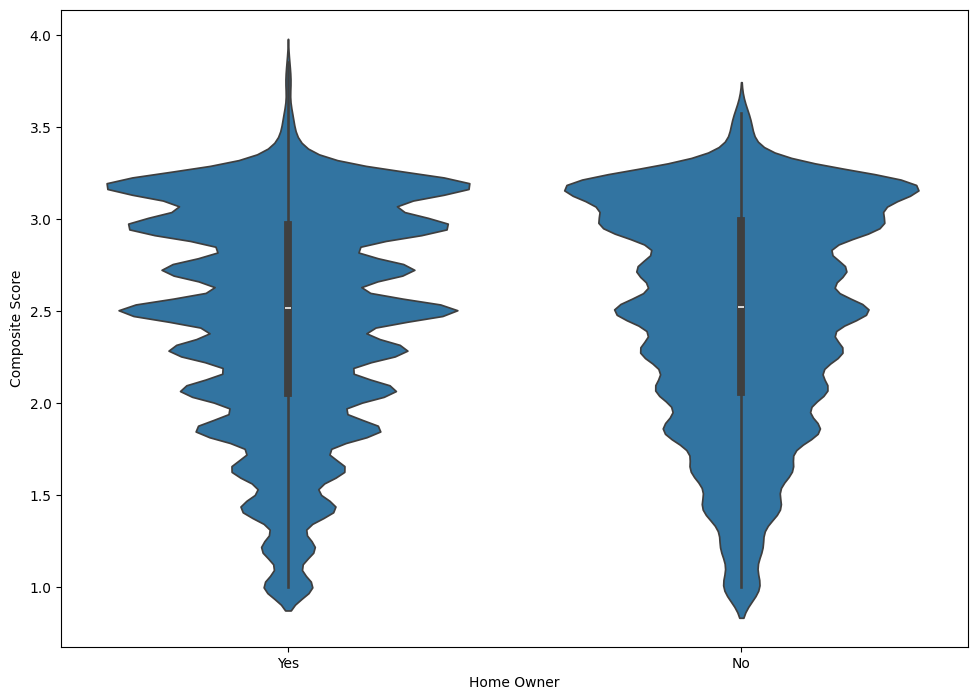

In [ ]:
# Home Owner
sns.violinplot(data=anls, x="Home Owner", y="Composite Score")

## G. Comparison

In [ ]:
# Best Customer and Worst Customer Characteristics
# Grouped EDA
mark = []
for x in anls['Composite Score']:
  if x > 3:
    y = 'High'
  elif x < 1.5:
    y = 'Low'
  else:
    y = 'Normal'
  mark.append(y)

anls['mark'] = mark
anls = anls[anls['mark'].isin(['Low','High'])]

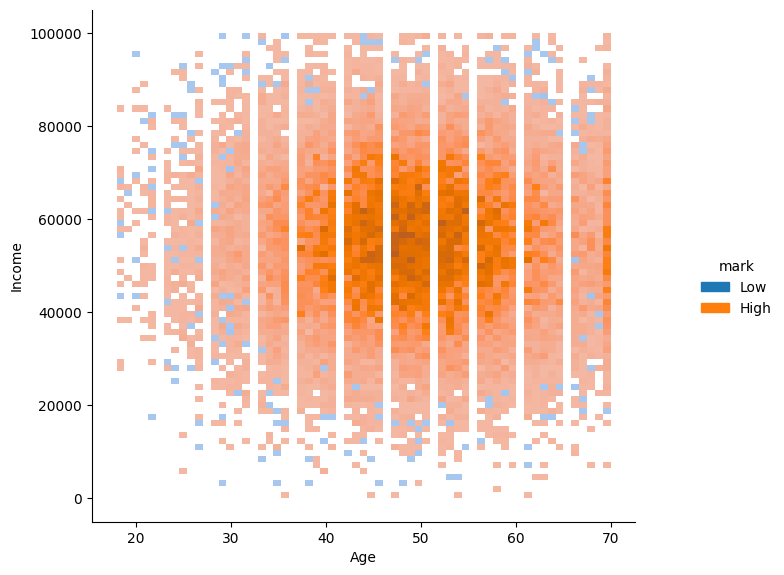

In [ ]:
g = sns.displot(data=anls, x="Age", y="Income", hue='mark')
g.fig.set_figwidth(8.27)
g.fig.set_figheight(6)

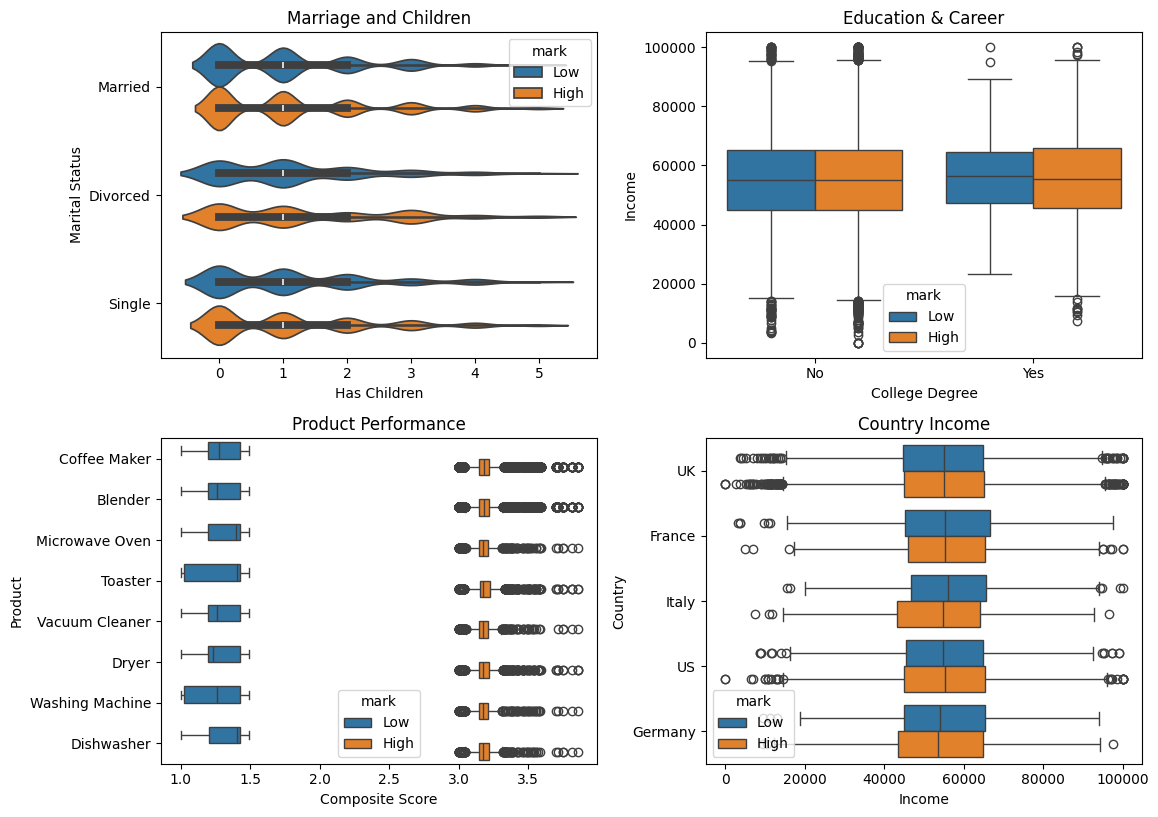

In [ ]:
fig, axs = plt.subplots(2, 2)

# Has Children And Marital Status
sns.violinplot(data=anls, x="Has Children", y="Marital Status", ax=axs[0, 0], hue="mark")
axs[0, 0].set_title('Marriage and Children')

# College Degree and Income
sns.boxplot(data=anls, x="College Degree", y="Income", ax=axs[0, 1], hue="mark")
axs[0, 1].set_title('Education & Career')

# Product Performance
sns.boxplot(data=anls, x="Composite Score", y="Product", ax=axs[1, 0], hue="mark")
axs[1, 0].set_title('Product Performance')

# Income each Country
sns.boxplot(data=anls, x="Income", y="Country", ax=axs[1, 1], hue="mark")
axs[1, 1].set_title('Country Income')

plt.tight_layout()
plt.show()